Importing 

In [4]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")



call File Pass

In [5]:
databasePath = "C:/Users/kholoud/Desktop/TestPic/lahman2014.sqlite"



Connect for SQL 

In [6]:
conn = sqlite3.connect(databasePath)


PART ONE: Data Wrangling (6 Marks) 
The student will be asked to use SQL to compute a relation containing the total payroll and winning percentage (number of wins/number of games * 100) for each team. The student should describe how she/he dealt with any missing data in these two relations. 
Besides, the student should include *other columns that will help when performing Exploratory Data Analysis later*


Now i show Table Salary And Team 

Salary --> yearID  teamID  lgID  playerID  salary


Teams  --> yearID  lgID    teamID franchID divID Rank G Ghome W L DivWin WCWin
           LgWin  WSWin  R AB H 2B 3B HR BB SO SB CS HBP SF RA ER ERA CG SHO SV 
           IPouts HA HRA BBA SOA E DP FP name park attendance BPF PPF teamIDBR teamIDlahman45 teamIDretro

In [7]:
query_salary = "SELECT* FROM Salaries "
query_salary = pd.read_sql(query_salary, conn)
query_salary
 

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000.0
1,1985,ATL,NL,bedrost01,550000.0
2,1985,ATL,NL,benedbr01,545000.0
3,1985,ATL,NL,campri01,633333.0
4,1985,ATL,NL,ceronri01,625000.0
...,...,...,...,...,...
24753,2014,WAS,NL,storedr01,3450000.0
24754,2014,WAS,NL,strasst01,3975000.0
24755,2014,WAS,NL,werthja01,20000000.0
24756,2014,WAS,NL,zimmejo02,7500000.0


In [8]:
query_Teams  = "SELECT* FROM Teams  "
query_Teams  = pd.read_sql(query_Teams, conn)
query_Teams 
 

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NA,FW1,KEK,None,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NA,NY2,NNA,None,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2014,NL,PIT,PIT,C,2,162,81.0,88,74,...,148.0,0.983,Pittsburgh Pirates,PNC Park,2442564.0,98,97,PIT,PIT,PIT
2771,2014,NL,SDN,SDP,W,3,162,81.0,77,85,...,124.0,0.983,San Diego Padres,Petco Park,2195373.0,91,91,SDP,SDN,SDN
2772,2014,NL,SFN,SFG,W,2,162,81.0,88,74,...,155.0,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN
2773,2014,NL,SLN,STL,C,1,162,81.0,90,72,...,145.0,0.985,St. Louis Cardinals,Busch Stadium III,3540649.0,101,100,STL,SLN,SLN


for get columns name for team

In [9]:
for col in query_Teams.columns: 
    print(col) 

yearID
lgID
teamID
franchID
divID
Rank
G
Ghome
W
L
DivWin
WCWin
LgWin
WSWin
R
AB
H
2B
3B
HR
BB
SO
SB
CS
HBP
SF
RA
ER
ERA
CG
SHO
SV
IPouts
HA
HRA
BBA
SOA
E
DP
FP
name
park
attendance
BPF
PPF
teamIDBR
teamIDlahman45
teamIDretro


Some info about each team  team ID , yearID ( it is exist in two tables)

#we need salary sum as payroll---> called it payroll

*it is my needs in this Table*

In [10]:
salary= "SELECT teamID, yearID, sum(salary) as payroll FROM Salaries GROUP BY yearID, teamID ORDER BY teamID"
pf_salary = pd.read_sql(salary, conn)
pf_salary


,teamID,yearID,payroll
0,ANA,1997,31135472.0
1,ANA,1998,41281000.0
2,ANA,1999,55388166.0
3,ANA,2000,51464167.0
4,ANA,2001,47535167.0
...,...,...,...
855,WAS,2010,61400000.0
856,WAS,2011,63856928.0
857,WAS,2012,80855143.0
858,WAS,2013,113703270.0


1- in team table now we need the same info like Salaries table 
2- we need to extract -->wins (W), games(G) to  compute win rate

In [11]:
team= "SELECT teamID, yearID, W, G, 100*CAST(W AS float)/G AS win_percentage FROM Teams GROUP BY yearID, teamID ORDER BY teamID"
pd_team= pd.read_sql(team, conn)
pd_team

,teamID,yearID,W,G,win_percentage
0,ALT,1884,6,25,24.000000
1,ANA,1997,84,162,51.851852
2,ANA,1998,85,162,52.469136
3,ANA,1999,70,162,43.209877
4,ANA,2000,82,162,50.617284
...,...,...,...,...,...
2770,WS8,1887,46,126,36.507937
2771,WS8,1888,48,136,35.294118
2772,WS8,1889,41,127,32.283465
2773,WS9,1891,44,139,31.654676


Now we need to Marge between to tables
use inner to drop repet columns 
Handel Missing Data using Inner 

In [12]:
Merge_tables = pf_salary.merge(pd_team, how ="inner",left_on=["yearID", "teamID"],right_on=["yearID", "teamID"])
Merge_tables

,teamID,yearID,payroll,W,G,win_percentage
0,ANA,1997,31135472.0,84,162,51.851852
1,ANA,1998,41281000.0,85,162,52.469136
2,ANA,1999,55388166.0,70,162,43.209877
3,ANA,2000,51464167.0,82,162,50.617284
4,ANA,2001,47535167.0,75,162,46.296296
...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593
854,WAS,2011,63856928.0,80,161,49.689441
855,WAS,2012,80855143.0,98,162,60.493827
856,WAS,2013,113703270.0,86,162,53.086420


PART TWO: Exploratory Data Analysis (12 Marks) 
Payroll distribution (6 Marks) 
The student will be asked to:
    illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014). Then,
    she/he should comment on this distribution of payrolls conditioned on time based on the plots in terms of central tendency, spread, etc.? 
    The student should provide evidence for the provided statements

In [13]:
distribution = Merge_tables[Merge_tables.yearID > 1989]
distribution
                            
                            

,teamID,yearID,payroll,W,G,win_percentage
0,ANA,1997,31135472.0,84,162,51.851852
1,ANA,1998,41281000.0,85,162,52.469136
2,ANA,1999,55388166.0,70,162,43.209877
3,ANA,2000,51464167.0,82,162,50.617284
4,ANA,2001,47535167.0,75,162,46.296296
...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593
854,WAS,2011,63856928.0,80,161,49.689441
855,WAS,2012,80855143.0,98,162,60.493827
856,WAS,2013,113703270.0,86,162,53.086420


In [14]:
distribution = distribution[distribution.yearID < 2015]
distribution

,teamID,yearID,payroll,W,G,win_percentage
0,ANA,1997,31135472.0,84,162,51.851852
1,ANA,1998,41281000.0,85,162,52.469136
2,ANA,1999,55388166.0,70,162,43.209877
3,ANA,2000,51464167.0,82,162,50.617284
4,ANA,2001,47535167.0,75,162,46.296296
...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593
854,WAS,2011,63856928.0,80,161,49.689441
855,WAS,2012,80855143.0,98,162,60.493827
856,WAS,2013,113703270.0,86,162,53.086420


Second point we need to Plots it 

In [15]:
distribution_plot = distribution.pivot(index ='teamID', columns='yearID', values='payroll')
distribution_plot

yearID,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
teamID,,,,,,,,,,,,,,,,,,,,,
ANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31135472.0,41281000.0,55388166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32347000.0,68703999.0,...,62329166.0,59684226.0,52067546.0,66202712.0,73115666.0,60718166.0,53639833.0,73804833.0,90132000.0,97861500.0
ATL,14555501.0,18403500.0,34625333.0,41641417.0,49383513.0,47235445.0,49698500.0,52278500.0,61186000.0,73140000.0,...,86457302.0,90156876.0,87290833.0,102365683.0,96726166.0,84423666.0,87002692.0,82829942.0,87871525.0,97609000.0
BAL,9680084.0,17519000.0,23780667.0,29096500.0,38849769.0,43942521.0,54490315.0,58516400.0,72355634.0,80605863.0,...,73914333.0,72585582.0,93174808.0,67196246.0,67101666.0,81612500.0,85304038.0,77353999.0,84393333.0,103416000.0
BOS,20558333.0,35167500.0,43610584.0,37120583.0,37859084.0,32455518.0,42393500.0,43558750.0,56757000.0,63497500.0,...,123505125.0,120099824.0,143026214.0,133390035.0,121345999.0,162447333.0,161762475.0,173186617.0,151530000.0,139019929.0
CAL,21720000.0,33060001.0,34749334.0,28588334.0,25156218.0,31223171.0,28738000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHA,9491500.0,16919667.0,30160833.0,39696166.0,39183836.0,46961282.0,45139500.0,57740000.0,38335000.0,25620000.0,...,75178000.0,102750667.0,108671833.0,121189332.0,96068500.0,105530000.0,127789000.0,96919500.0,120065277.0,81830500.0
CHN,13624000.0,23175667.0,29829686.0,39386666.0,36287333.0,29505834.0,33081000.0,42155333.0,50838000.0,62343000.0,...,87032933.0,94424499.0,99670332.0,118345833.0,134809000.0,146609000.0,125047329.0,88197033.0,100567726.0,65522500.0
CIN,14370000.0,26305333.0,35931499.0,44879666.0,40961833.0,43144670.0,42526334.0,49768000.0,23005000.0,33962761.0,...,61892583.0,60909519.0,68524980.0,74117695.0,73558500.0,71761542.0,75947134.0,82203616.0,106404462.0,108217500.0


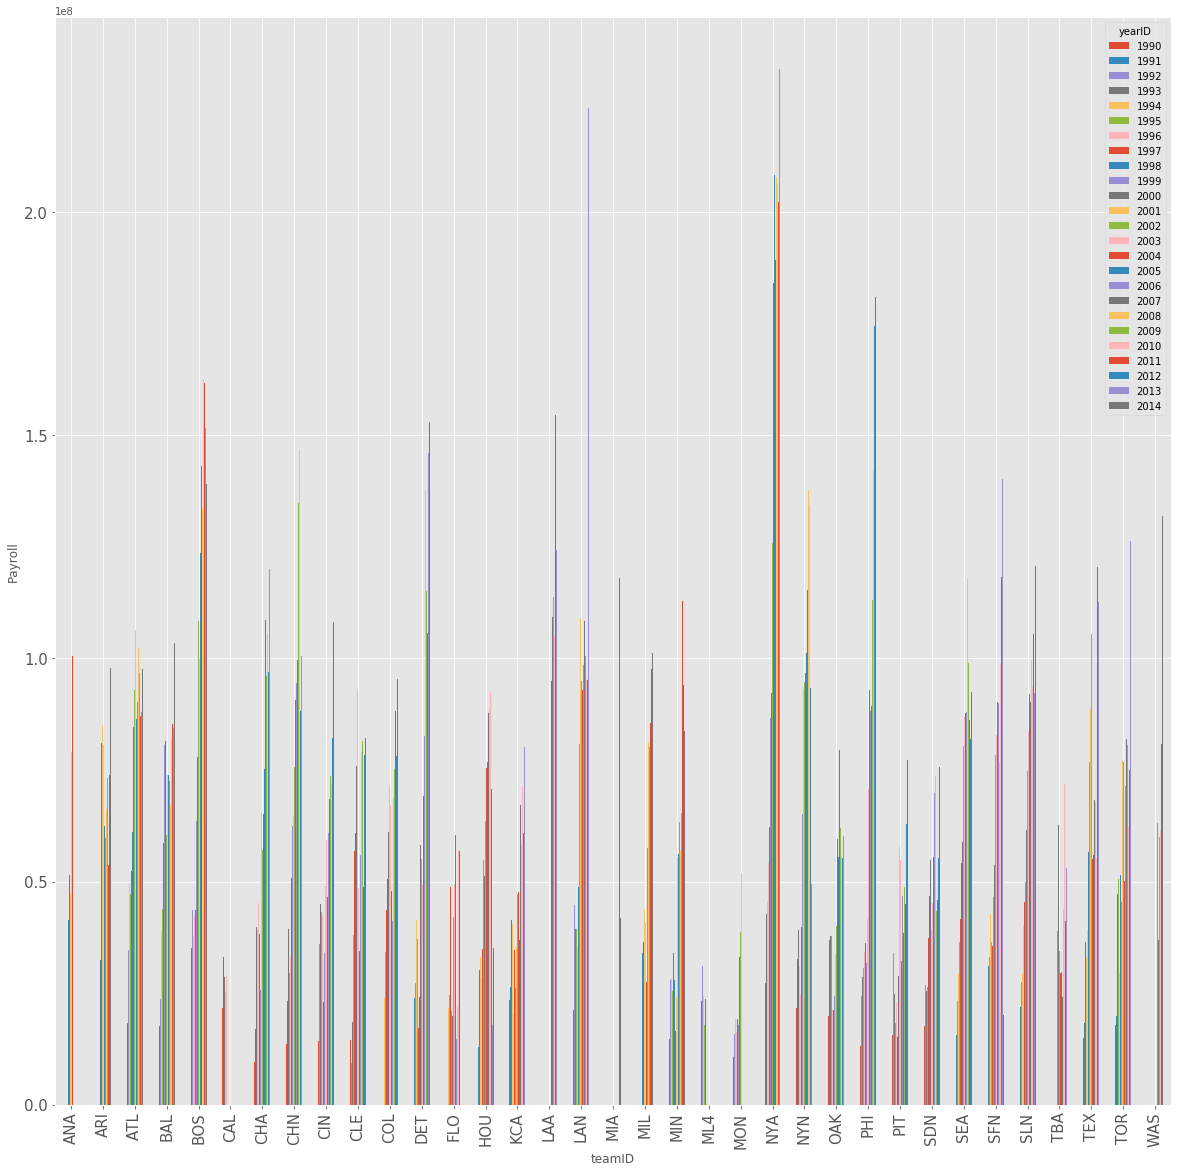

In [16]:
distribution_plot.plot(kind = 'bar', figsize=(20, 20), fontsize=15)
plt.xlabel("teamID")
plt.ylabel("Payroll")
plt.show()

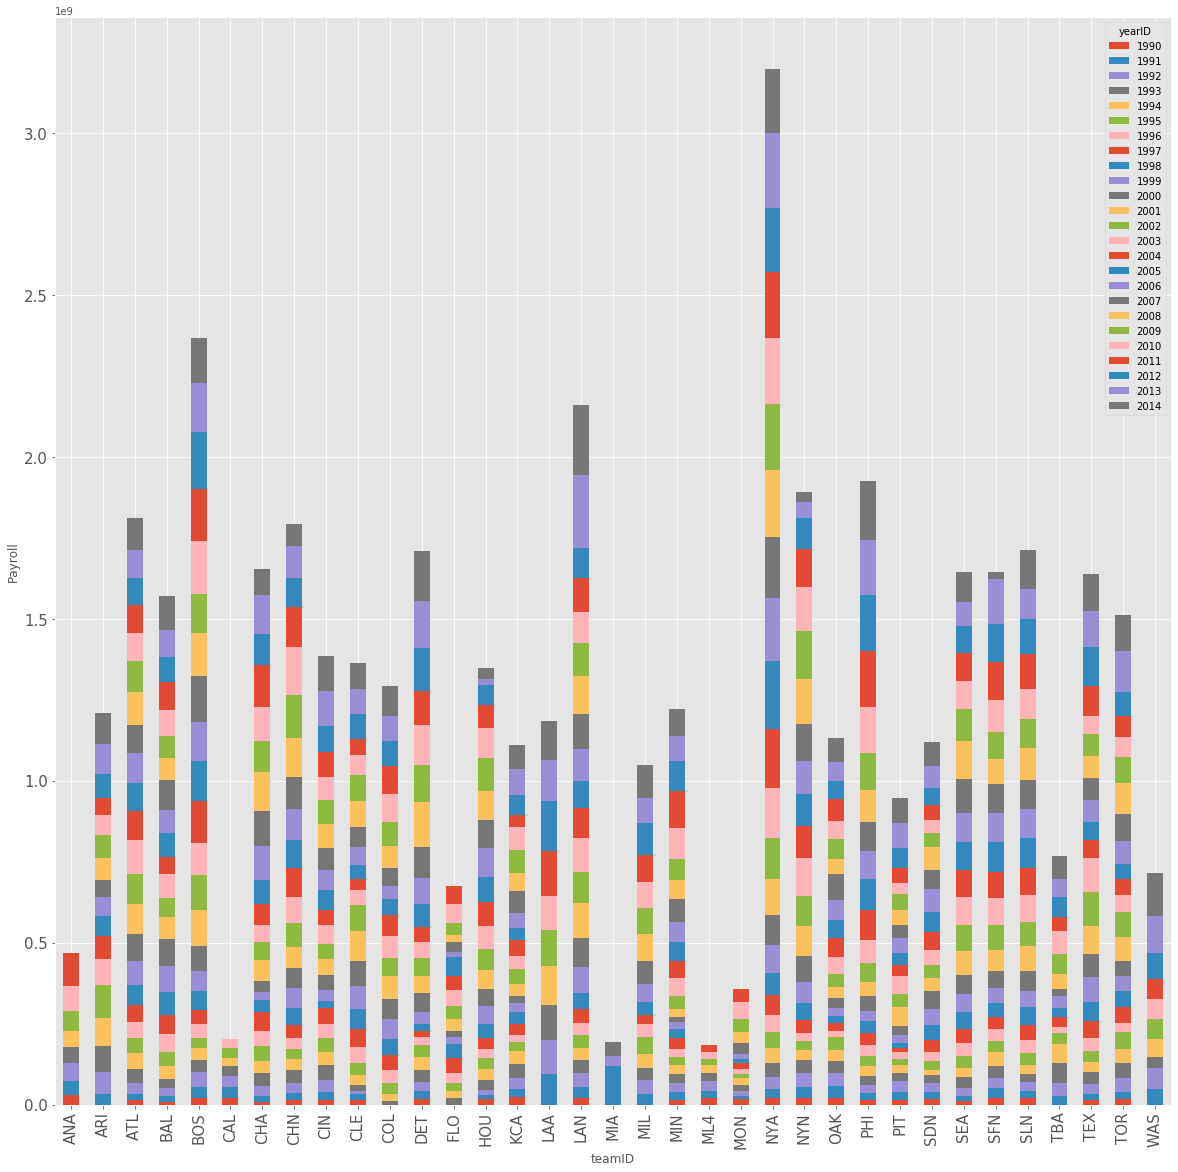

In [17]:
distribution_plot.plot(kind = 'bar',stacked = True, figsize=(20, 20), fontsize=15)
plt.xlabel("teamID")
plt.ylabel("Payroll")
plt.show()

 she/he should comment on this distribution of payrolls conditioned on time based on the plots in terms of central tendency, spread

My comment :: 
        i think  central tendency and spread increased by the time 
        And that through my studies of plots


The student should provide evidence for the provided statements. 


In [18]:

Mean_col= distribution_plot.mean()
distribution_plot.loc['Avg'] = Mean_col
distribution_plot

yearID,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
teamID,,,,,,,,,,,,,,,,,,,,,
ANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.113547e+07,4.128100e+07,55388166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.234700e+07,68703999.0,...,6.232917e+07,5.968423e+07,5.206755e+07,66202712.0,7.311567e+07,60718166.0,5.363983e+07,7.380483e+07,9.013200e+07,9.786150e+07
ATL,1.455550e+07,1.840350e+07,34625333.0,4.164142e+07,49383513.00,4.723544e+07,4.969850e+07,5.227850e+07,6.118600e+07,73140000.0,...,8.645730e+07,9.015688e+07,8.729083e+07,102365683.0,9.672617e+07,84423666.0,8.700269e+07,8.282994e+07,8.787152e+07,9.760900e+07
BAL,9.680084e+06,1.751900e+07,23780667.0,2.909650e+07,38849769.00,4.394252e+07,5.449032e+07,5.851640e+07,7.235563e+07,80605863.0,...,7.391433e+07,7.258558e+07,9.317481e+07,67196246.0,6.710167e+07,81612500.0,8.530404e+07,7.735400e+07,8.439333e+07,1.034160e+08
BOS,2.055833e+07,3.516750e+07,43610584.0,3.712058e+07,37859084.00,3.245552e+07,4.239350e+07,4.355875e+07,5.675700e+07,63497500.0,...,1.235051e+08,1.200998e+08,1.430262e+08,133390035.0,1.213460e+08,162447333.0,1.617625e+08,1.731866e+08,1.515300e+08,1.390199e+08
CAL,2.172000e+07,3.306000e+07,34749334.0,2.858833e+07,25156218.00,3.122317e+07,2.873800e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHA,9.491500e+06,1.691967e+07,30160833.0,3.969617e+07,39183836.00,4.696128e+07,4.513950e+07,5.774000e+07,3.833500e+07,25620000.0,...,7.517800e+07,1.027507e+08,1.086718e+08,121189332.0,9.606850e+07,105530000.0,1.277890e+08,9.691950e+07,1.200653e+08,8.183050e+07
CHN,1.362400e+07,2.317567e+07,29829686.0,3.938667e+07,36287333.00,2.950583e+07,3.308100e+07,4.215533e+07,5.083800e+07,62343000.0,...,8.703293e+07,9.442450e+07,9.967033e+07,118345833.0,1.348090e+08,146609000.0,1.250473e+08,8.819703e+07,1.005677e+08,6.552250e+07
CIN,1.437000e+07,2.630533e+07,35931499.0,4.487967e+07,40961833.00,4.314467e+07,4.252633e+07,4.976800e+07,2.300500e+07,33962761.0,...,6.189258e+07,6.090952e+07,6.852498e+07,74117695.0,7.355850e+07,71761542.0,7.594713e+07,8.220362e+07,1.064045e+08,1.082175e+08


To get Just AVG  column

In [19]:
mean = distribution_plot.drop(distribution_plot.index[range(0,35)])
mean

yearID,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
teamID,,,,,,,,,,,,,,,,,,,,,
Avg,1.707235e+07,2.357879e+07,30982435.5,3.220500e+07,33137010.25,3.398105e+07,3.417798e+07,4.026021e+07,4.260943e+07,49807625.0,...,7.295711e+07,7.738242e+07,8.255630e+07,89495289.0,8.882423e+07,90711995.5,9.281684e+07,9.775804e+07,1.011509e+08,9.980002e+07


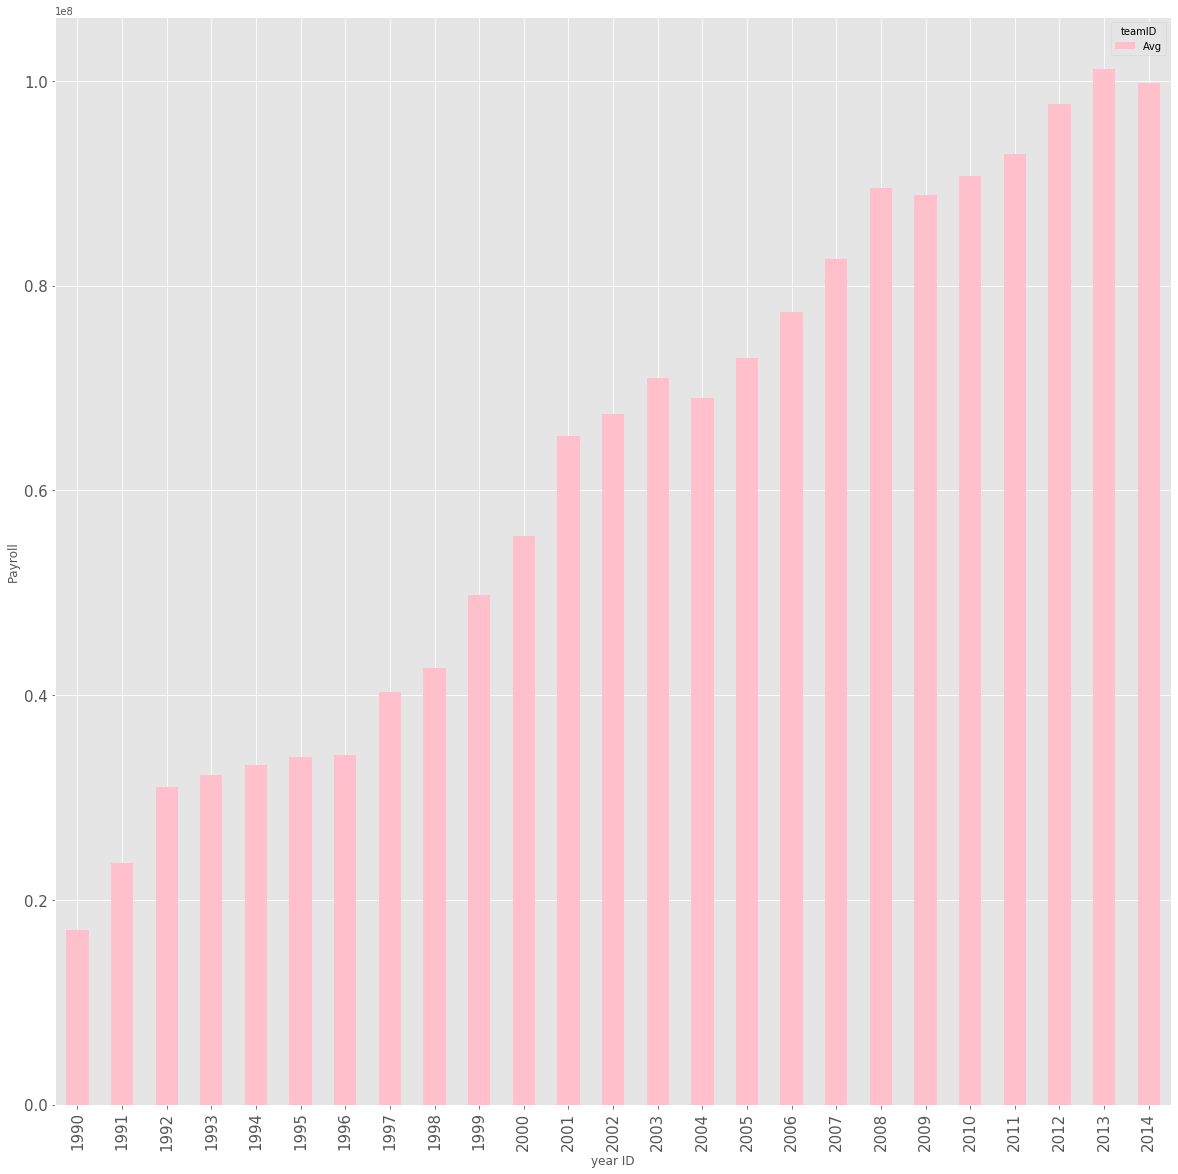

In [20]:
mean = mean.transpose()
mean.plot(kind = 'bar',figsize=(20,20), fontsize=15 ,color = "pink")
plt.xlabel("year ID")
plt.ylabel("Payroll")
plt.show()

Correlation between payroll and winning percentage (6 Marks) 

The student will be asked to write code to discretize years into five time-periods and then 
make a scatterplot showing the mean winning percentage (y-axis) versus the mean payroll (x-axis) 
for each of the five time-periods. (4 Marks) 
The student should comment on the team payrolls across these periods.
Then, she/he has to answer the questions “Are there any teams that stand out as being particularly good at paying for wins across these periods? 
What can you say about the Oakland A's spending efficiency across these periods?” (2 Marks)

In [21]:
YEARS = [1990,1992,2001,2005,2007,2014]
Period_names=['time_periods_1','time_periods_2','time_periods_3','time_periods_4','time_periods_5']

distribution['period'] = pd.cut(distribution['yearID'],YEARS, right=False, labels = Period_names)
distribution['yearID'] = distribution['yearID'].astype(int)
distribution


,teamID,yearID,payroll,W,G,win_percentage,period
0,ANA,1997,31135472.0,84,162,51.851852,time_periods_2
1,ANA,1998,41281000.0,85,162,52.469136,time_periods_2
2,ANA,1999,55388166.0,70,162,43.209877,time_periods_2
3,ANA,2000,51464167.0,82,162,50.617284,time_periods_2
4,ANA,2001,47535167.0,75,162,46.296296,time_periods_3
...,...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593,time_periods_5
854,WAS,2011,63856928.0,80,161,49.689441,time_periods_5
855,WAS,2012,80855143.0,98,162,60.493827,time_periods_5
856,WAS,2013,113703270.0,86,162,53.086420,time_periods_5


teamID         ATL         BAL         BOS         CAL         CHA  \
yearID                                                               
1990    14555501.0   9680084.0  20558333.0  21720000.0   9491500.0   
1991    18403500.0  17519000.0  35167500.0  33060001.0  16919667.0   

teamID         CHN         CIN         CLE         DET         HOU  ...  \
yearID                                                              ...   
1990    13624000.0  14370000.0  14487000.0  17593238.0  18330000.0  ...   
1991    23175667.0  26305333.0  17635000.0  23838333.0  12852500.0  ...   

teamID         NYN         OAK         PHI         PIT         SDN  \
yearID                                                               
1990    21722834.0  19887501.0  13173667.0  15556000.0  17588334.0   
1991    32590001.0  36999167.0  22487332.0  23634667.0  22150001.0   

teamID         SEA         SFN         SLN         TEX         TOR  
yearID                                                              

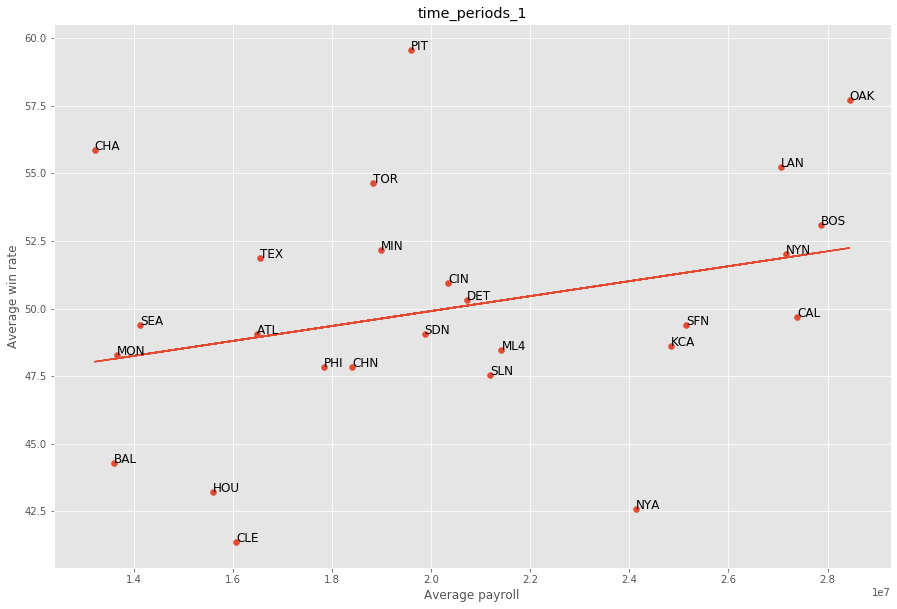

teamID         ANA         ARI         ATL         BAL         BOS  \
yearID                                                               
1992           NaN         NaN  34625333.0  23780667.0  43610584.0   
1993           NaN         NaN  41641417.0  29096500.0  37120583.0   
1994           NaN         NaN  49383513.0  38849769.0  37859084.0   
1995           NaN         NaN  47235445.0  43942521.0  32455518.0   
1996           NaN         NaN  49698500.0  54490315.0  42393500.0   
1997    31135472.0         NaN  52278500.0  58516400.0  43558750.0   
1998    41281000.0  32347000.0  61186000.0  72355634.0  56757000.0   
1999    55388166.0  68703999.0  73140000.0  80605863.0  63497500.0   
2000    51464167.0  81027833.0  84537836.0  81447435.0  77940333.0   

teamID         CAL         CHA         CHN         CIN         CLE  ...  \
yearID                                                              ...   
1992    34749334.0  30160833.0  29829686.0  35931499.0   9373044.0  ...   
1993

TOR     47079833.0  51376000.0  45444333.0  44838332.0  


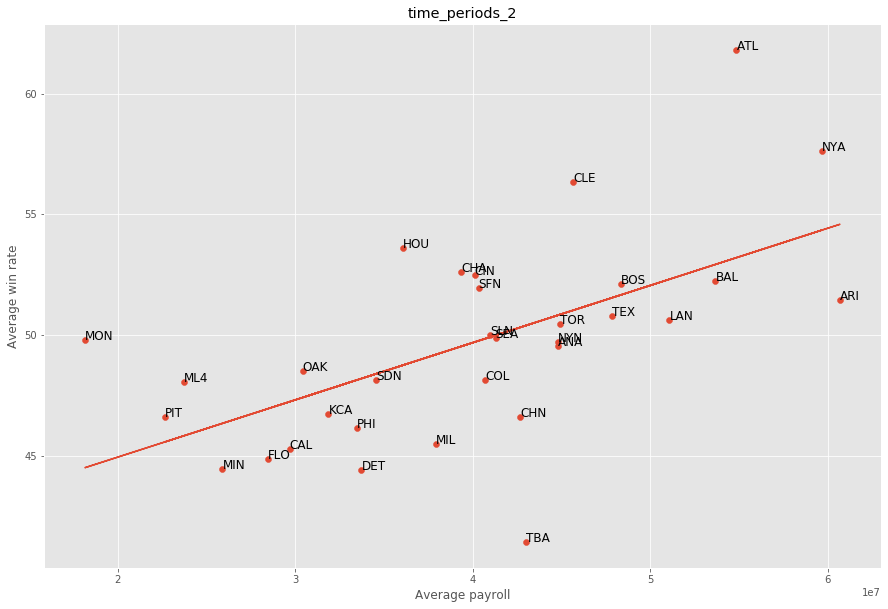

teamID          ANA          ARI          ATL         BAL          BOS  \
yearID                                                                   
2001     47535167.0   85082999.0   91936166.0  67599540.0  110035833.0   
2002     61721667.0  102819999.0   92870367.0  60493487.0  108366060.0   
2003     79031667.0   80657000.0  106243667.0  73877500.0   99946500.0   
2004    100534667.0   69780750.0   90182500.0  51623333.0  127298500.0   

teamID         CHA         CHN         CIN         CLE         COL  ...  \
yearID                                                              ...   
2001    65653667.0  64715833.0  48986000.0  93152001.0  71541334.0  ...   
2002    57052833.0  75690833.0  45050390.0  78909449.0  56851043.0  ...   
2003    51010000.0  79868333.0  59355667.0  48584834.0  67179667.0  ...   
2004    65212500.0  90560000.0  46615250.0  34319300.0  65445167.0  ...   

teamID         OAK         PHI         PIT         SDN         SEA  \
yearID                            

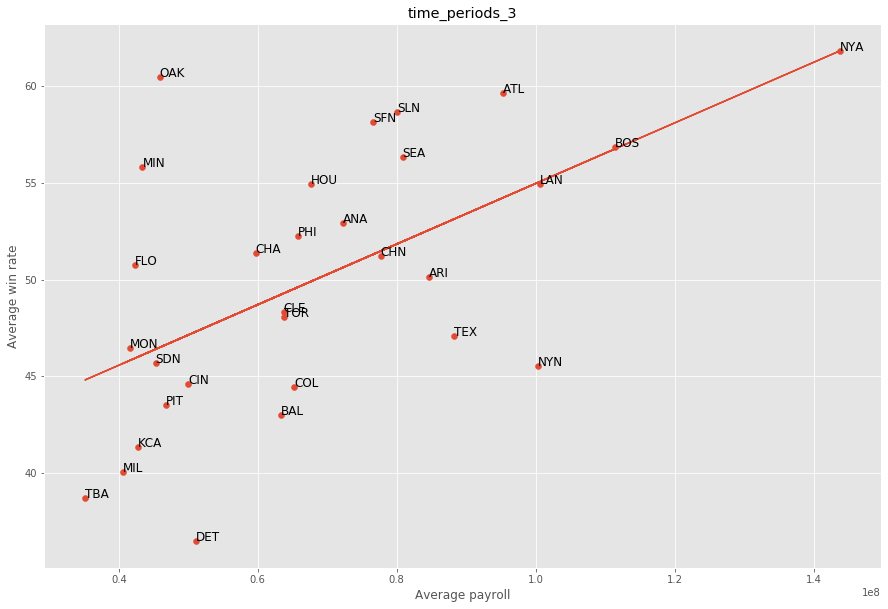

teamID         ARI         ATL         BAL          BOS          CHA  \
yearID                                                                 
2005    62329166.0  86457302.0  73914333.0  123505125.0   75178000.0   
2006    59684226.0  90156876.0  72585582.0  120099824.0  102750667.0   

teamID         CHN         CIN         CLE         COL         DET  ...  \
yearID                                                              ...   
2005    87032933.0  61892583.0  41502500.0  47839000.0  69092000.0  ...   
2006    94424499.0  60909519.0  56031500.0  41233000.0  82612866.0  ...   

teamID         PHI         PIT         SDN         SEA         SFN  \
yearID                                                               
2005    95522000.0  38133000.0  63290833.0  87754334.0  90199500.0   
2006    88273333.0  46717750.0  69896141.0  87959833.0  90056419.0   

teamID         SLN         TBA         TEX         TOR         WAS  
yearID                                                      

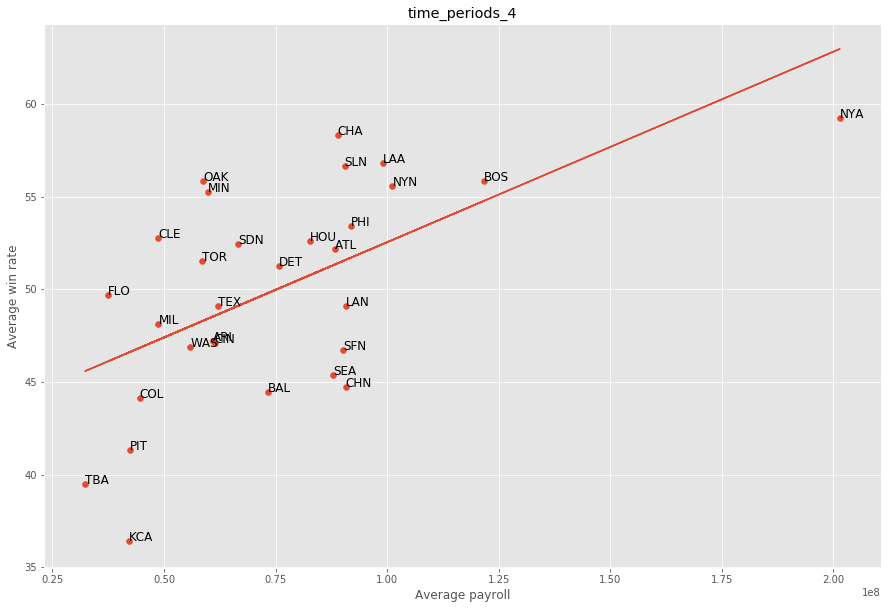

teamID         ARI          ATL         BAL          BOS          CHA  \
yearID                                                                  
2007    52067546.0   87290833.0  93174808.0  143026214.0  108671833.0   
2008    66202712.0  102365683.0  67196246.0  133390035.0  121189332.0   
2009    73115666.0   96726166.0  67101666.0  121345999.0   96068500.0   
2010    60718166.0   84423666.0  81612500.0  162447333.0  105530000.0   
2011    53639833.0   87002692.0  85304038.0  161762475.0  127789000.0   
2012    73804833.0   82829942.0  77353999.0  173186617.0   96919500.0   
2013    90132000.0   87871525.0  84393333.0  151530000.0  120065277.0   

teamID          CHN          CIN         CLE         COL          DET  ...  \
yearID                                                                 ...   
2007     99670332.0   68524980.0  61673267.0  54041000.0   94800369.0  ...   
2008    118345833.0   74117695.0  78970066.0  68655500.0  137685196.0  ...   
2009    134809000.0   73558500

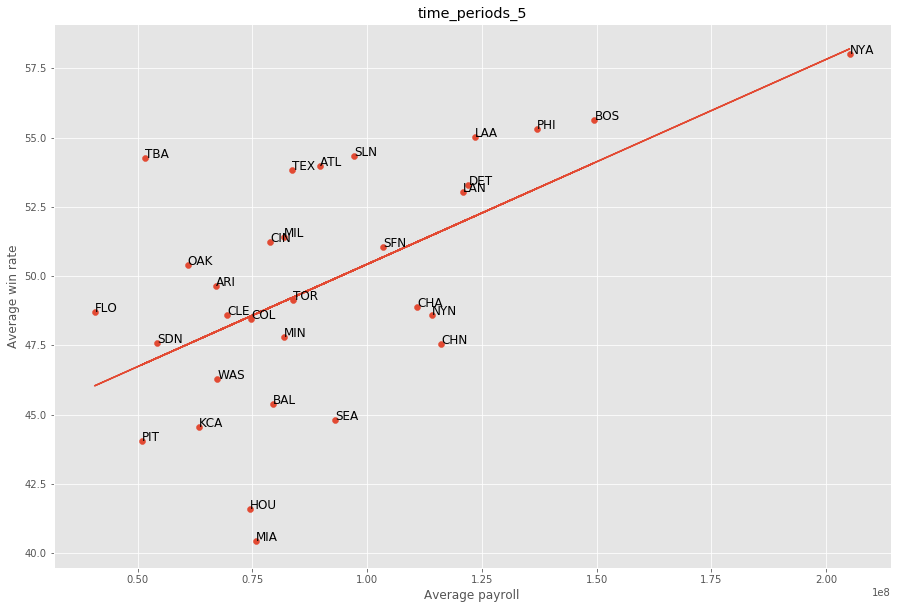

In [22]:
for period in Period_names:
    per = distribution[distribution.period  == period]
    x = per.pivot(index='yearID', columns='teamID', values='payroll')  
    print(x)
    y = per.pivot(index='yearID', columns='teamID', values='win_percentage')
    print(y)

    x_data = x.mean().values
    print(x_data)

    y_data = y.mean().values
    print(y_data)

    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    x = x.transpose()
    print(x)
    
    # for put names on points in plots
    for i, txt in enumerate(x.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Average payroll")
    plt.ylabel("Average win rate")
    plt.title(period)
    plt.show()

PART THREE: Data Transformations (12 Marks) 
Standardizing across years (4 Marks) 
Since comparing payrolls across years is misleading, so the student will be asked to do data transformation (Eqn 1.) that will help with these comparisons. (2 Marks) 
        (Eqn 1.) 
for the team i in year j, where avg_payrollj is the average payroll for year j, and sj is the standard deviation of payroll for year j. 
Then, the student will be asked to plot the winning percentage (y-axis) versus the transformed (standardized) payroll and discuss the relationship with respect to the graph before the data transformation. (2 Marks) 
Expected wins (4 Marks) 

It's hard to see global trends across time periods using these multiple plots, but now that we have standardized payrolls across time, we can look at a single plot showing the correlation between winning percentage and payroll across time. In this way, the student will be asked to make a single scatter plot of the winning percentage (y-axis) vs. the standardized payroll (x-axis) and add a regression line to highlight the relationship. (2 Marks) The regression line gives the expected winning percentage as a function of standardized payroll. Then, the student will be asked to analyze the results with respect to the expected winning percentage (Eqn. 2). (2 Marks) 
 
  (Eqn. 2) 
for the team i in year j. 
Spending efficiency (4 Marks) 
Using the result of the previous requirements, the student can now create a single plot that makes it easier to compare teams’ efficiency (Eqn. 3). The idea is to create a new measurement unit for each team based on their winning percentage and their expected winning percentage that we can plot across time summarizing how efficient each team is in their spending. (2 Marks) 
 
     (Eqn. 3) 
for the team i in year j. 
Concerning the student’s experience throughout the performed analyses, the student will be asked to make use of such experience and answer the question “How good was Oakland's efficiency during the Moneyball period?” (2 Marks) 


ince comparing payrolls across years is misleading, so the student will be asked to do data transformation (Eqn 1.) that will help with these comparisons. (2 Marks) 
        (Eqn 1.) 
for the team i in year j, where avg_payrollj is the average payroll for year j, and sj is the standard deviation of payroll for year j.

In [24]:
list1 = []
list2 = []
b = distribution_plot.std()

distribution_plot.loc['StandardDev'] = b
for i, j in distribution.iterrows():
    a = 0
    for year in distribution_plot:
        if (year == (j['yearID'])):
            list1.append(distribution_plot[year].Average)
            list2.append(distribution_plot[year].StandardDev)
            a = a + 1
    if (a == 0):
        list1.append(np.NaN)
        list2.append(np.NaN)
averages = pd.DataFrame(list1, columns = ['raw'])
distribution['average'] = averages           
stddevs = pd.DataFrame(list2, columns = ['raw'])
distribution['standardDev'] = stddevs
# Adding a new column computing the standard payroll of each team and their corresponding year
distribution['std_payroll'] = (distribution['payroll']-distribution['average'])/ (distribution['standardDev'])
distribution

AttributeError: 'Series' object has no attribute 'Average'

the student will be asked to make a single scatter plot of the winning percentage (y-axis) vs. the standardized payroll (x-axis) and add a regression line to highlight the relationship. (2 Marks) The regression line gives the expected winning percentage as a function of standardized payroll. Then, the student will be asked to analyze the results with respect to the expected winning percentage (Eqn. 2). (2 Marks) 
 

In [ ]:
# Computing average total payroll and win rate for each team
a = distribution.pivot(index='yearID', columns='teamID', values='std_payroll')
b = distribution.pivot(index='yearID', columns='teamID', values='win_rate')
x_data = a.mean().values
y_data = b.mean().values
x_data =np.nan_to_num(x_data)  
fit = np.polyfit(x = x_data,y = y_data,deg = 1)
plt.figure(figsize = (15,10))
plt.plot(x_data, fit[0] * x_data + fit[1])
plt.scatter(x_data, y_data)
a = a.transpose()
for i, txt in enumerate(a.index):
    plt.annotate(txt, (x_data[i],y_data[i]),size=12)
plt.xlabel("Average standard payroll")
plt.ylabel("Averge win rate")
plt.title("From 1990 to 2014")
plt.show()


In [211]:
distribution['expected_win_pct'] = 50 + 2.5*distribution['std_payroll']
distribution


,teamID,yearID,total_payroll,W,G,win_rate,period,average,standardDev,std_payroll,expected_win_pct
0,ANA,1997,3.113547e+07,84.000000,162.000000,51.851852,time_periods_2,4.026021e+07,1.282538e+07,-0.711459,48.221351
1,ANA,1998,4.128100e+07,85.000000,162.000000,52.469136,time_periods_2,4.260943e+07,1.512229e+07,-0.087846,49.780386
2,ANA,1999,5.538817e+07,70.000000,162.000000,43.209877,time_periods_2,4.980762e+07,2.021574e+07,0.276049,50.690123
3,ANA,2000,5.146417e+07,82.000000,162.000000,50.617284,time_periods_2,5.553784e+07,2.105626e+07,-0.193466,49.516335
4,ANA,2001,4.753517e+07,75.000000,162.000000,46.296296,time_periods_3,6.535544e+07,2.429242e+07,-0.733574,48.166066
...,...,...,...,...,...,...,...,...,...,...,...
854,WAS,2011,6.385693e+07,80.000000,161.000000,49.689441,time_periods_5,NaN,NaN,NaN,NaN
855,WAS,2012,8.085514e+07,98.000000,162.000000,60.493827,time_periods_5,NaN,NaN,NaN,NaN
856,WAS,2013,1.137033e+08,86.000000,162.000000,53.086420,time_periods_5,NaN,NaN,NaN,NaN
857,WAS,2014,1.319837e+08,96.000000,162.000000,59.259259,NaN,NaN,NaN,NaN,NaN


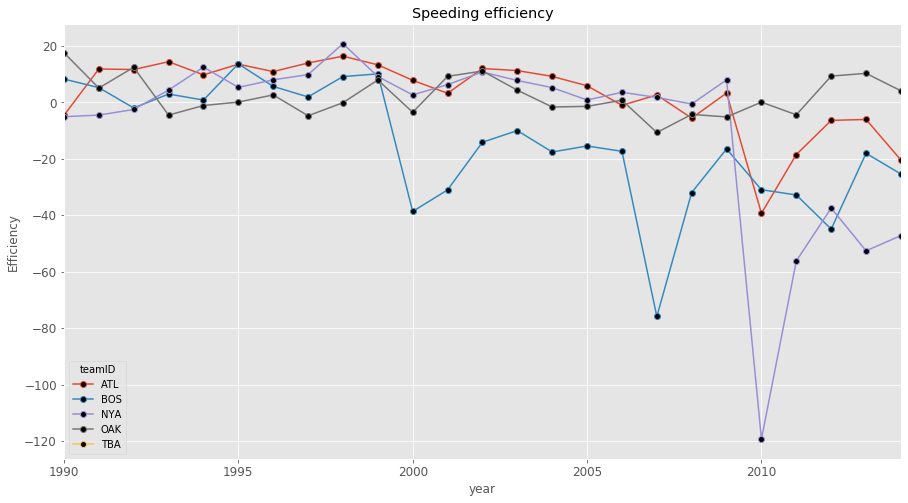

In [212]:
distribution['efficiency'] = distribution['win_rate'] - distribution['expected_win_pct']


s_efficiency = distribution[distribution.yearID > 1989]
s_efficiency = s_efficiency[s_efficiency.yearID < 2015]

s1 = s_efficiency[s_efficiency.teamID == 'BOS' ]
s2 = s_efficiency[s_efficiency.teamID == 'OAK' ]
s3 = s_efficiency[s_efficiency.teamID == 'NYA' ]
s4 = s_efficiency[s_efficiency.teamID == 'ATL' ]
s5 = s_efficiency[s_efficiency.teamID == 'TBA' ]

frames = [s1,s2,s3,s4,s5]
s_efficiency = pd.concat(frames)

s_efficiency = s_efficiency.pivot(index='yearID', columns='teamID', values='efficiency')
s_efficiency.plot(kind = 'line',title ="Speeding efficiency", markevery = 1, marker='o', markerfacecolor='black', figsize=(15, 8), legend=True, fontsize=12)
plt.xlabel("year")
plt.ylabel("Efficiency")
plt.show()

In [ ]:

 
for i in st:
    Teams=[s_efficiency.teamID == i]
    

print(Teams)